In [73]:
import pandas as pd
import numpy as np
from scipy import sparse
import xgboost as xgb
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
from sklearn import utils

In [103]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0, num_rounds=1000):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.1
    param['max_depth'] = 6
    param['silent'] = 1
    param['num_class'] = 2
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plist = list(param.items())
    xgtrain = xgb.DMatrix(train_X,label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test')]
        model = xgb.train(plist,xgtrain,num_rounds,watchlist,early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plist, xgtrain, num_rounds)
    
    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [2]:
input_path = '../../localData/prj3/training_data/sift_features/sift_features.csv'

In [53]:
total_df = pd.read_csv(input_path).transpose()

In [54]:
total_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
image_0001,0.000000,0.0,0.0,0.0,0.000636,0.001907,0.000636,0.0,0.001272,0.000000,...,0.0,0.000000,0.001272,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
image_0002,0.000000,0.0,0.0,0.0,0.000626,0.003757,0.000000,0.0,0.001252,0.000626,...,0.0,0.000626,0.000626,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
image_0003,0.000847,0.0,0.0,0.0,0.000847,0.002540,0.001693,0.0,0.000847,0.000847,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000847,0.0
image_0004,0.000000,0.0,0.0,0.0,0.000566,0.001697,0.000566,0.0,0.003394,0.000566,...,0.0,0.000000,0.000566,0.0,0.0,0.0,0.0,0.000566,0.000000,0.0
image_0005,0.000000,0.0,0.0,0.0,0.000000,0.002770,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.002770,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [55]:
total_df.shape

(2000, 5000)

In [56]:
labels = [1 for i in range(1000)] + [0 for i in range(1000)]
total_df['label'] = labels

In [57]:
total_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,label
image_0001,0.000000,0.0,0.0,0.0,0.000636,0.001907,0.000636,0.0,0.001272,0.000000,...,0.000000,0.001272,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1
image_0002,0.000000,0.0,0.0,0.0,0.000626,0.003757,0.000000,0.0,0.001252,0.000626,...,0.000626,0.000626,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1
image_0003,0.000847,0.0,0.0,0.0,0.000847,0.002540,0.001693,0.0,0.000847,0.000847,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000847,0.0,1
image_0004,0.000000,0.0,0.0,0.0,0.000566,0.001697,0.000566,0.0,0.003394,0.000566,...,0.000000,0.000566,0.0,0.0,0.0,0.0,0.000566,0.000000,0.0,1
image_0005,0.000000,0.0,0.0,0.0,0.000000,0.002770,0.000000,0.0,0.000000,0.000000,...,0.000000,0.002770,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1


In [58]:
total_df = utils.shuffle(total_df)
total_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,label
image_0495,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.002963,0.000000,...,0.0,0.001481,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
image_1679,0.0,0.0,0.0,0.000000,0.0,0.008264,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
image_0580,0.0,0.0,0.0,0.000628,0.0,0.001255,0.000000,0.0,0.002511,0.000628,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000628,1
image_1372,0.0,0.0,0.0,0.001876,0.0,0.001876,0.001876,0.0,0.001876,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
image_0701,0.0,0.0,0.0,0.000000,0.0,0.000691,0.000000,0.0,0.000000,0.000691,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001381,1


In [59]:
train_test_ratio = 0.8
n_total = total_df.shape[0]
n_train = int(n_total*train_test_ratio)

In [60]:
train_df = total_df.iloc[:n_train]
test_df = total_df.iloc[n_train:]

In [87]:
train_X = train_df.ix[:,:5000]
train_y = train_df['label']

In [88]:
test_X = test_df.ix[:,:5000]

In [89]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
image_0495,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.002963,0.000000,...,0.000000,0.0,0.001481,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
image_1679,0.0,0.0,0.0,0.000000,0.0,0.008264,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
image_0580,0.0,0.0,0.0,0.000628,0.0,0.001255,0.000000,0.0,0.002511,0.000628,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000628
image_1372,0.0,0.0,0.0,0.001876,0.0,0.001876,0.001876,0.0,0.001876,0.000000,...,0.001876,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
image_0701,0.0,0.0,0.0,0.000000,0.0,0.000691,0.000000,0.0,0.000000,0.000691,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001381


In [91]:
train_y.head()

image_0495    1
image_1679    0
image_0580    1
image_1372    0
image_0701    1
Name: label, dtype: int64

In [90]:
test_X.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
image_1643,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.002584,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
image_0044,0.000865,0.0,0.0,0.0,0.000000,0.000865,0.000000,0.0,0.001730,0.000865,...,0.0,0.0,0.000000,0.000865,0.0,0.0,0.000865,0.000000,0.000865,0.000865
image_1064,0.000000,0.0,0.0,0.0,0.000000,0.003381,0.000000,0.0,0.000676,0.000000,...,0.0,0.0,0.000676,0.000000,0.0,0.0,0.000000,0.000000,0.000676,0.000000
image_0248,0.000000,0.0,0.0,0.0,0.000574,0.002295,0.000574,0.0,0.001147,0.000574,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000574,0.000000,0.000000
image_0695,0.001100,0.0,0.0,0.0,0.000000,0.003300,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.001100,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [92]:
train_X = sparse.csr_matrix(train_X.values)
test_X = sparse.csr_matrix(test_X.values)

In [93]:
train_y = np.array(train_y)

In [138]:
cv_scores = []
#models = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=59)
for dev_index, val_index in kf.split(range(train_X.shape[0])):
        dev_X, val_X = train_X[dev_index,:], train_X[val_index,:]
        dev_y, val_y = train_y[dev_index], train_y[val_index]
        preds, model = runXGB(dev_X, dev_y, val_X, val_y)
        #models.append(model)
        cv_scores.append(log_loss(val_y, preds))
        print(cv_scores)
        break

[0]	train-mlogloss:0.6549	test-mlogloss:0.678684
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
[1]	train-mlogloss:0.619704	test-mlogloss:0.664651
[2]	train-mlogloss:0.588206	test-mlogloss:0.651588
[3]	train-mlogloss:0.560346	test-mlogloss:0.642711
[4]	train-mlogloss:0.53557	test-mlogloss:0.637924
[5]	train-mlogloss:0.511347	test-mlogloss:0.62577
[6]	train-mlogloss:0.490171	test-mlogloss:0.620112
[7]	train-mlogloss:0.468784	test-mlogloss:0.613386
[8]	train-mlogloss:0.444904	test-mlogloss:0.607982
[9]	train-mlogloss:0.4265	test-mlogloss:0.604896
[10]	train-mlogloss:0.408853	test-mlogloss:0.598852
[11]	train-mlogloss:0.390162	test-mlogloss:0.593428
[12]	train-mlogloss:0.37204	test-mlogloss:0.593274
[13]	train-mlogloss:0.35765	test-mlogloss:0.588929
[14]	train-mlogloss:0.342636	test-mlogloss:0.581678
[15]	train-mlogloss:0.329515	test-mlogloss:0.578981
[16]	train-mlogloss:0.318473	test-m

In [141]:
#preds, _ = runXGB(train_X, train_y, test_X, num_rounds=400)
xgtest = xgb.DMatrix(test_X)
preds = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
out_df = pd.DataFrame(preds)
out_df.columns = ["labradoodle","friedChicken"]
out_df["image_id"] = test_df.index
out_df.to_csv("../output/prediction_xgboost.csv", index=False)

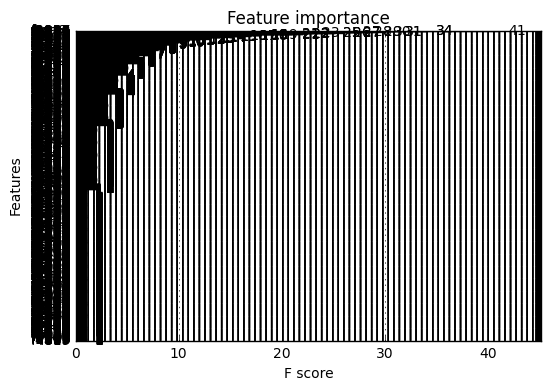

In [140]:
%matplotlib inline
xgb.plot_importance(model)